    Wavelength  Intensity     Source  intensity4cluster  Cluster
5          3.0   0.109300        spe           0.027325        0
17         3.0   0.948271  reference           0.237068        0
    Wavelength  Intensity     Source  intensity4cluster  Cluster
7          7.0   0.580010        spe           0.145002        1
8          7.1   0.950949        spe           0.237737        1
21         7.0   1.000000  reference           0.250000        1
    Wavelength  Intensity     Source  intensity4cluster  Cluster
6          6.0   0.333366        spe           0.083341        3
20         6.0   0.306955  reference           0.076739        3
    Wavelength  Intensity     Source  intensity4cluster  Cluster
1         1.45   0.129761        spe           0.032440        4
2         1.50   0.844274        spe           0.211069        4
14        1.50   0.216594  reference           0.054148        4
15        1.75   0.450306  reference           0.112577        4
    Wavelength  Intensity

Text(0, 0.5, 'locations 2')

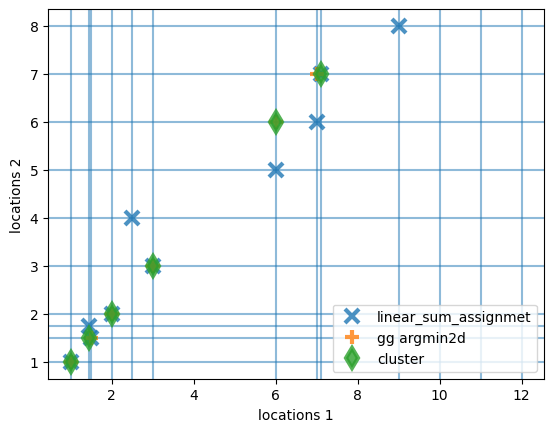

In [1]:
from scipy.optimize import linear_sum_assignment

import ramanchada2 as rc2
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 1.45, 1.5, 2, 2.5, 3, 6, 7, 7.1, 9, 10, 11, 12])
y = np.array([1, 1.5, 1.75, 2, 3, 4, 5, 6, 7, 8.])

lsa_x_idx, lsa_y_idx = np.array(linear_sum_assignment(np.abs(np.subtract.outer(x, y))))
gg_x_idx, gg_y_idx = rc2.misc.utils.find_closest_pairs_idx(x, y)

xdict = dict(zip(x, np.ones_like(x)))
ydict = dict(zip(y, np.ones_like(y)))
# equal y axis causes ValueError: Input X contains NaN.
# so random number values are set
xdict = dict(zip(x, 10*np.random.uniform(size=len(x))))
ydict = dict(zip(y, np.random.uniform(size=len(x))))

xcluster, ycluster, distances, df = rc2.misc.utils.match_peaks_cluster(xdict, ydict)
print(xcluster, ycluster)

line_kw = dict(alpha=.5)
for i in x:
    plt.axvline(i, **line_kw)
    
for i in y:
    plt.axhline(i, **line_kw)

point_kw = dict(markersize=10, mew=3, alpha=.8)
plt.plot(x[lsa_x_idx], y[lsa_y_idx], 'x', label='linear_sum_assignmet', **point_kw)
plt.plot(x[gg_x_idx], y[gg_y_idx], '+', label='gg argmin2d', **point_kw)
plt.plot(xcluster, ycluster, 'd', label='cluster', **point_kw)
plt.legend(loc='lower right')
plt.xlabel('locations 1')
plt.ylabel('locations 2')

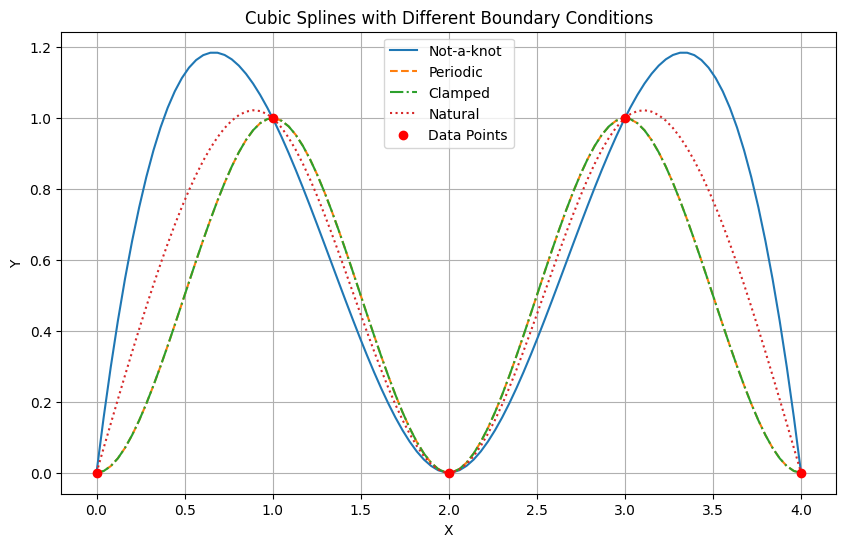

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Sample data points
x = np.array([0, 1, 2, 3, 4])
y = np.array([0, 1, 0, 1, 0])

# Create cubic splines with different boundary conditions
cs_not_a_knot = CubicSpline(x, y, bc_type='not-a-knot')
cs_periodic = CubicSpline(x, y, bc_type='periodic')
cs_clamped = CubicSpline(x, y, bc_type=((1, 0.0), (1, 0.0)))  # Horizontal at both ends
cs_natural = CubicSpline(x, y, bc_type='natural')

# Generate values for plotting
x_new = np.linspace(0, 4, 100)
y_not_a_knot = cs_not_a_knot(x_new)
y_periodic = cs_periodic(x_new)
y_clamped = cs_clamped(x_new)
y_natural = cs_natural(x_new)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(x_new, y_not_a_knot, label='Not-a-knot', linestyle='-')
plt.plot(x_new, y_periodic, label='Periodic', linestyle='--')
plt.plot(x_new, y_clamped, label='Clamped', linestyle='-.')
plt.plot(x_new, y_natural, label='Natural', linestyle=':')
plt.scatter(x, y, color='red', label='Data Points', zorder=5)
plt.title("Cubic Splines with Different Boundary Conditions")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()


In [ ]:

rc2.misc.utils.argmin2d([[0.02495501, 0.73891171],[0.02821465, 0.7409368 ]])

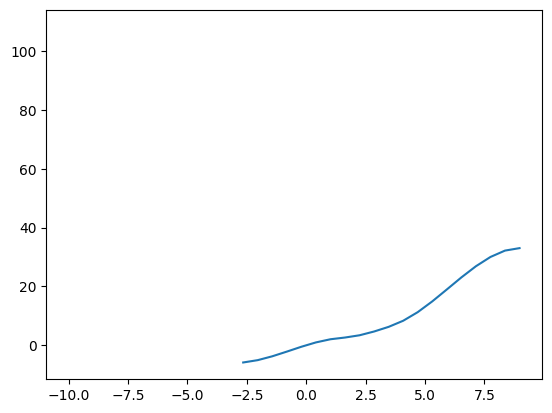

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import PchipInterpolator

# Sample data
z = np.array([1, 2, 3, 4, 5, 6])
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 2, 3, 5, 8, 13])  # monotonic y

# Set up the PCHIP interpolator
interp = PchipInterpolator(x, y, extrapolate=True)

# Points to interpolate
x_new = np.linspace(-10, 20, 50)  # Includes points outside of x's range for extrapolation
y_new = interp(x_new)

# Check monotonicity
is_monotonic = np.all(np.diff(y_new) >= 0)  # Replace >= with <= if y should be decreasing

# If not monotonic, set y_new to NaN where non-monotonicity is detected
if not is_monotonic:
    y_new = np.where(np.diff(y_new, prepend=y_new[0]) < 0, np.nan, y_new)

plt.plot(x_new,y_new)


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

grouped = df.groupby('Cluster')
x_spe = np.array([])
x_reference = np.array([])
x_distance = np.array([])
clusters = np.array([])
for cluster, group in grouped:
    unique_sources = group['Source'].unique()
    if 'reference' in unique_sources and 'spe' in unique_sources:
        x = None
        r = None
        e_min = None                    
        for w_spe in group.loc[group["Source"] == "spe"]["Wavelength"].values:
            for w_ref in group.loc[group["Source"] == "reference"]["Wavelength"].values:
                e = euclidean_distances(w_spe.reshape(-1, 1), w_ref.reshape(-1, 1))[0][0]
                if (e_min is None) or (e < e_min):
                    print(w_spe,w_ref,e, e_min, cluster)
                    x = w_spe
                    r = w_ref
                    e_min = e
        x_spe = np.append(x_spe, x)
        x_reference = np.append(x_reference, r)
        x_distance = np.append(x_distance, e_min)
        clusters = np.append(clusters, cluster) 
sort_indices = np.argsort(x_spe)        

x_spe[sort_indices],x_reference[sort_indices],x_distance[sort_indices],clusters[sort_indices]

In [ ]:
x_peaks = np.array([1, 1.5, 2, 2.5, 3, 6, 7, 7.1, 9, 10, 11, 12])
y_peaks = np.array([1, 2, 3, 4, 5, 6, 7, 8.])
# Example usage
xdict = dict(zip(x_peaks, np.random.uniform(size=len(x))))
ydict = dict(zip(y_peaks, np.random.uniform(size=len(x))))

xdict,ydict
n_clusters = max(len(x_peaks),len(y_peaks))
n_clusters

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

def normalize_intensity(intensities):
    # Normalize intensity using Min-Max scaling
    scaler = MinMaxScaler()
    return scaler.fit_transform(intensities.reshape(-1, 1)).flatten()

def argmin2d(A):
    ymin_idx = np.argmin(A, axis=0)
    xmin_idx = np.argmin(A, axis=1)
    x_idx = np.unique(xmin_idx[xmin_idx[ymin_idx[xmin_idx]] == xmin_idx])
    y_idx = np.unique(ymin_idx[ymin_idx[xmin_idx[ymin_idx]] == ymin_idx])
    matches = np.stack([y_idx, x_idx]).T
    return matches

def cluster_peaks_with_intensity(x_peak_dict, y_peak_dict, n_clusters):
    # Extract peaks and intensities from the dictionaries
    x_peaks = np.array(list(x_peak_dict.keys()))
    x_intensities = np.array(list(x_peak_dict.values()))
    y_peaks = np.array(list(y_peak_dict.keys()))
    y_intensities = np.array(list(y_peak_dict.values()))

    # Normalize the intensities separately
    normalized_x_intensities = normalize_intensity(x_intensities)
    normalized_y_intensities = normalize_intensity(y_intensities)

    # Create a combined feature set for clustering (position and normalized intensity)
    x_features = np.vstack((x_peaks, normalized_x_intensities)).T
    y_features = np.vstack((y_peaks, normalized_y_intensities)).T
    
    # Combine all features and apply KMeans
    all_features = np.vstack((x_features, y_features))
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(all_features)
    
    # Get the labels for both x and y peaks
    labels = kmeans.labels_
    x_labels = labels[:len(x_peaks)]
    y_labels = labels[len(x_peaks):]
    
    # Calculate cluster centers for x and y peaks
    x_cluster_centers = [np.mean(x_features[x_labels == i], axis=0) for i in range(n_clusters)]
    y_cluster_centers = [np.mean(y_features[y_labels == i], axis=0) for i in range(n_clusters)]
    
    return np.array(x_cluster_centers), np.array(y_cluster_centers)

def match_cluster_centers_with_argmin(x_centers, y_centers):
    # Compute cost matrix (Euclidean distance between cluster centers)
    cost_matrix = np.linalg.norm(x_centers[:, np.newaxis] - y_centers, axis=2)
    
    matches = argmin2d(cost_matrix)
    return matches



In [ ]:

# Step 1: Cluster peaks with intensity
x_cluster_centers, y_cluster_centers = cluster_peaks_with_intensity(
    xdict, ydict, n_clusters)

print(list(zip(x_cluster_centers, y_cluster_centers)))

# Step 2: Match cluster centers using argmin2d
matched_pairs = match_cluster_centers_with_argmin(x_cluster_centers, y_cluster_centers)
print("Matched cluster centers (with separately normalized intensity):", matched_pairs)


print("Matched peak pairs (with tolerance):")
for m in matched_pairs:
    print(m)
